In [175]:
import pandas as pd
import datetime
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [59]:
df=pd.read_csv("asistencia_limpio2.csv")

In [ ]:
DISCRETIZAR LA VARIABLE KM
standardscaler para: dia,semana,año, numero total visitas? o todas
Undersample y oversample
el split va antes de hacer el scaler, etc

In [134]:
df.dtypes

fecha_cita                                object
horario_inicio                             int64
edad                                       int64
departamento                              object
asistencia                                object
km                                       float64
genero                                    object
dia_semana                                 int64
semana                                     int64
año                                        int64
numero de visita                           int64
numero_total_visitas                       int64
nacionalidad2                             object
inasistencias_previas                      int64
porcentaje_inasistencia_departamentos    float64
dtype: object

In [60]:
df.head()

,fecha_cita,horario_inicio,edad,departamento,asistencia,km,genero,dia_semana,semana,año,numero de visita,numero_total_visitas,nacionalidad2,inasistencias_previas,porcentaje_inasistencia_departamentos
0,2018-09-03,9,68,integrada,SI,53.3,femenino,1,36,2018,1,45,ESP,0,0.185608
1,2018-09-03,9,43,integrada,NO,3.24,femenino,1,36,2018,1,2,ESP,0,0.185608
2,2018-09-03,9,36,integrada,SI,3.24,masculino,1,36,2018,1,5,ESP,0,0.185608
3,2018-09-03,11,78,integrada,SI,6.78,femenino,1,36,2018,1,92,ESP,0,0.185608
4,2018-09-03,10,75,integrada,SI,2.21,masculino,1,36,2018,1,19,ESP,0,0.185608


In [62]:
#en km hay alguno con error en codigo postal, decido eliminarlos
df[df.km=="error cp"].value_counts()

fecha_cita  horario_inicio  edad  departamento   asistencia  km        genero     dia_semana  semana  año   numero de visita  numero_total_visitas  nacionalidad2  inasistencias_previas  porcentaje_inasistencia_departamentos
2020-04-24  14              31    integrada      NO          error cp  masculino  5           17      2020  1                 1                     ESP            0                      0.185608                                 6
2020-03-20  14              31    integrada      NO          error cp  femenino   5           12      2020  1                 1                     ESP            0                      0.185608                                 4
2020-04-03  14              31    integrada      NO          error cp  femenino   5           14      2020  1                 1                     ESP            0                      0.185608                                 4
2020-03-20  14              31    integrada      NO          error cp  masculino  5      

In [63]:
df=df[df.km!="error cp"]

In [64]:
df["km"]=df.km.astype(float)

In [94]:
df.dropna(axis=0,inplace=True)

In [66]:
df.horario_inicio.value_counts()

18    33263
16    30253
10    28867
17    25496
12    20831
15    20360
8     20256
11    18874
9     15591
19    15196
13     8827
20     8234
14     6774
21      133
22        2
Name: horario_inicio, dtype: int64

<AxesSubplot:>

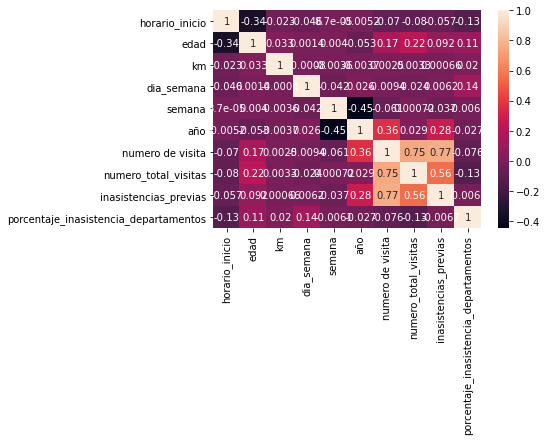

In [67]:
sns.heatmap(df.corr(),annot=True)

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [26]:
df.head()

,fecha_cita,horario_inicio,edad,departamento,asistencia,km,genero,dia_semana,semana,año,numero de visita,nacionalidad2,numero_total_visitas,inasistencias_previas,porcentaje_inasistencia_departamentos
0,2018-09-03,9,68,integrada,SI,53.30,femenino,1,36,2018,1,ESP,45,0,0.185608
1,2018-09-03,9,43,integrada,NO,3.24,femenino,1,36,2018,1,ESP,2,0,0.185608
2,2018-09-03,9,35,integrada,SI,3.24,masculino,1,36,2018,1,ESP,5,0,0.185608
3,2018-09-03,11,78,integrada,SI,6.78,femenino,1,36,2018,1,ESP,92,0,0.185608
4,2018-09-03,10,75,integrada,SI,2.21,masculino,1,36,2018,1,ESP,19,0,0.185608


## Km

C:\Users\irazu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km'>

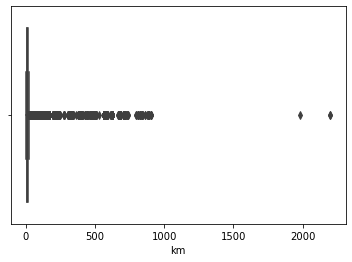

In [119]:
sns.boxplot(df.km)

In [ ]:
#discretizo la variable kbinsDiscretizer, para tener el rango de distancia

In [113]:
df.km.value_counts()

14.89     32890
10.00     32447
2.21      29278
9.38      25313
3.24      24602
          ...  
64.50         1
724.54        1
59.66         1
311.82        1
71.46         1
Name: km, Length: 417, dtype: int64

C:\Users\irazu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km', ylabel='count'>

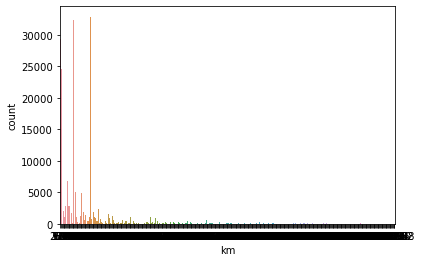

In [117]:
sns.countplot(df.km)

## Horario de inicio

C:\Users\irazu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horario_inicio', ylabel='count'>

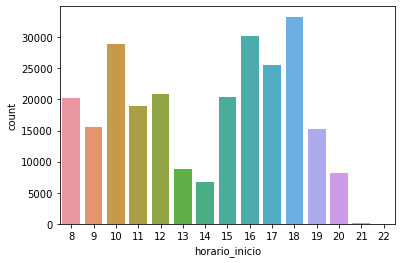

In [76]:
sns.countplot(df.horario_inicio)

In [81]:
df[df.asistencia=="NO"]["horario_inicio"].value_counts()

18    6177
16    5112
10    5030
17    4223
8     3712
12    3640
15    3478
11    3295
9     2821
19    2789
20    1770
13    1357
14    1215
21      14
Name: horario_inicio, dtype: int64

C:\Users\irazu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horario_inicio', ylabel='count'>

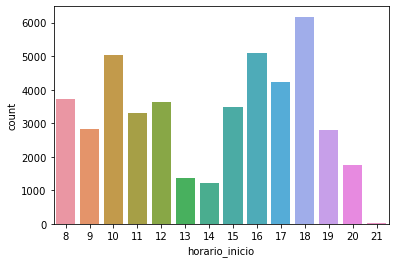

In [78]:
sns.countplot(df[df.asistencia=="NO"]["horario_inicio"])

C:\Users\irazu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horario_inicio', ylabel='count'>

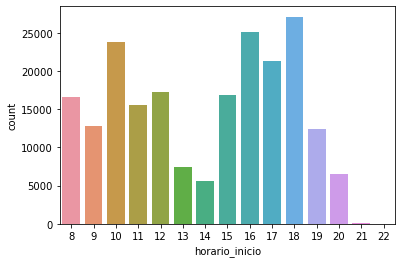

In [82]:
sns.countplot(df[df.asistencia=="SI"]["horario_inicio"])

C:\Users\irazu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='asistencia', ylabel='count'>

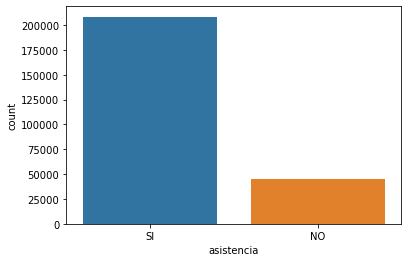

In [75]:
sns.countplot(df.asistencia)

C:\Users\irazu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genero', ylabel='count'>

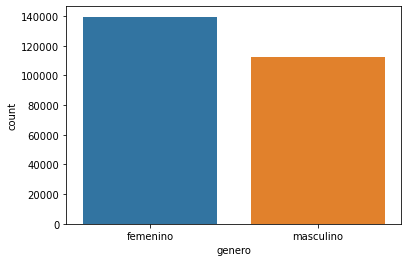

In [74]:
sns.countplot(df.genero)

# Modelos

In [101]:
df.head()

,fecha_cita,horario_inicio,edad,departamento,asistencia,km,genero,dia_semana,semana,año,numero de visita,numero_total_visitas,nacionalidad2,inasistencias_previas,porcentaje_inasistencia_departamentos
0,2018-09-03,9,68,integrada,SI,53.30,femenino,1,36,2018,1,45,ESP,0,0.185608
1,2018-09-03,9,43,integrada,NO,3.24,femenino,1,36,2018,1,2,ESP,0,0.185608
2,2018-09-03,9,36,integrada,SI,3.24,masculino,1,36,2018,1,5,ESP,0,0.185608
3,2018-09-03,11,78,integrada,SI,6.78,femenino,1,36,2018,1,92,ESP,0,0.185608
4,2018-09-03,10,75,integrada,SI,2.21,masculino,1,36,2018,1,19,ESP,0,0.185608


In [122]:
y=y.replace("NO",0).replace("SI",1)

In [108]:
df2=df[["horario_inicio","edad","genero","nacionalidad2","km","dia_semana","semana","año","numero de visita",
      "inasistencias_previas","porcentaje_inasistencia_departamentos"]]

In [109]:
#DATASET FINAL
df2.head()

,horario_inicio,edad,genero,nacionalidad2,km,dia_semana,semana,año,numero de visita,inasistencias_previas,porcentaje_inasistencia_departamentos
0,9,68,femenino,ESP,53.30,1,36,2018,1,0,0.185608
1,9,43,femenino,ESP,3.24,1,36,2018,1,0,0.185608
2,9,36,masculino,ESP,3.24,1,36,2018,1,0,0.185608
3,11,78,femenino,ESP,6.78,1,36,2018,1,0,0.185608
4,10,75,masculino,ESP,2.21,1,36,2018,1,0,0.185608


In [110]:
#esto lo tengo que hacer dentro de pipelines para probar el targetencoder y onehotencoder- pagina 41 del 17.2
#get_dummies de genero y nacionalidad
df2=pd.get_dummies(df2,columns=["genero","nacionalidad2"])

In [151]:
df2

,horario_inicio,edad,km,dia_semana,semana,año,numero de visita,inasistencias_previas,porcentaje_inasistencia_departamentos,genero_femenino,genero_masculino,nacionalidad2_ESP,nacionalidad2_Extranjero
0,9,68,53.30,1,36,2018,1,0,0.185608,1,0,1,0
1,9,43,3.24,1,36,2018,1,0,0.185608,1,0,1,0
2,9,36,3.24,1,36,2018,1,0,0.185608,0,1,1,0
3,11,78,6.78,1,36,2018,1,0,0.185608,1,0,1,0
4,10,75,2.21,1,36,2018,1,0,0.185608,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267544,10,78,10.00,5,34,2021,76,5,0.185608,1,0,1,0
267545,10,75,3.24,5,34,2021,51,5,0.185608,0,1,1,0
267547,8,46,7.96,5,34,2021,6,1,0.185608,0,1,1,0
267548,9,50,10.00,5,34,2021,7,1,0.185608,1,0,1,0


In [157]:
X=df2
y=df.asistencia.replace("NO",0).replace("SI",1)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)

In [159]:
lr = LinearRegression()

lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.026110133140583747

In [160]:
#modelo1
model1=DecisionTreeRegressor().fit(X_train,y_train)


In [161]:
model1.score(X_test,y_test)

-0.5088130170615004

In [ ]:
#lazyregressor
# fit all models
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)